# Data Science Intern Challenge - Fall 2022

<b>Contact info</b>
<br>
<b>Name:</b> Mardja Bueno
<br>
<b>email:</b> mardja.bueno@gmail.com
<br>

This notebook contains my answers for Shopify's Data Science intern challenge of Fall 2022.

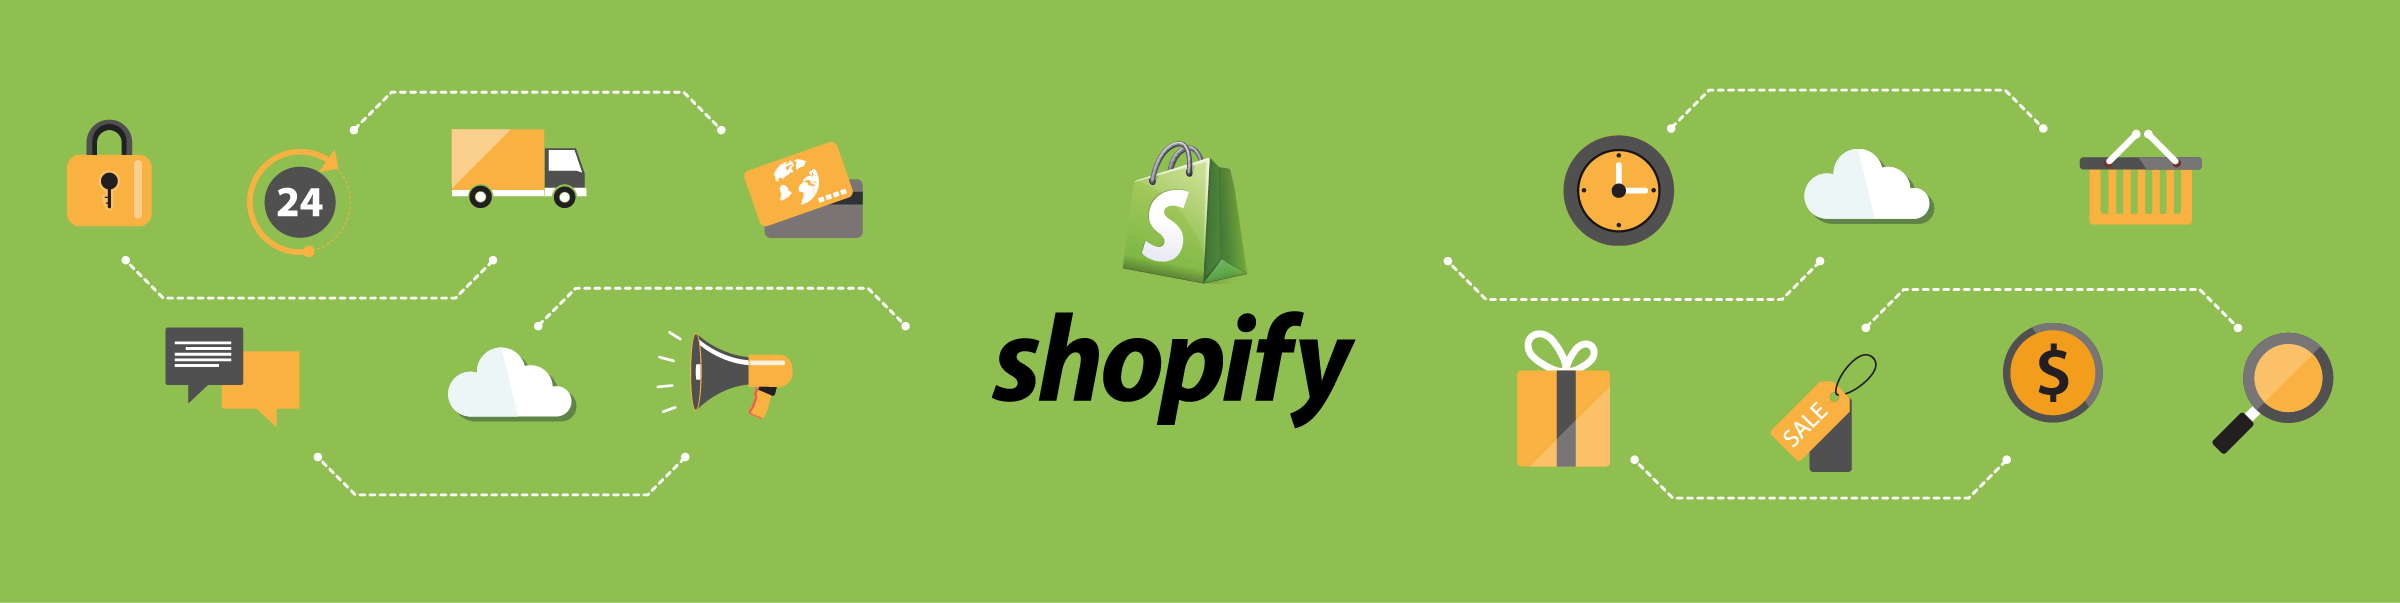

Image taken from https://treestone.com/shopify/

<b>Question 1:</b> On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.</b>

<b>a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.</b>

First, we'll need to import the necessary libraries for the data manipulation and load the dataset.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the dataset
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

# check the first 5 rows for all columns
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Then we'll proceed to checking the general information about the dataset

In [3]:
# check general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


From this, we can observe that there are 7 columns (order_id, shop_id, user_id, order_amount, total_items, payment_method and created_at) and 5000 rows corresponding to each one of the transactions. Additionally, there are no null values, so we don't need to worry about filling or removing them.

In [4]:
# check for duplicated values
df.duplicated().sum()

0

Moreover, there are no duplicated values, so the dataset is ready to be used.

Before starting the analysis, we'll perform a sanity check and see if the AOV of $3145.13 corresponds to the mean value of the row 'order_amount'.

In [5]:
# check if the AOV of 3145.13 is from the order_amount
df['order_amount'].describe().to_frame()

,order_amount
count,5000.000000
mean,3145.128000
std,41282.539349
min,90.000000
25%,163.000000
50%,284.000000
75%,390.000000
max,704000.000000


As we can see, the mean order_amount indeed corresponds to $3145.13, which is an extremely high value for the purchase of average sneakers. My first guess would be that we have outliers that are skewing the mean towards a higher value. To test this, first we'll calculate the median value for the order_amount, as the median is the middle value separating the higher half from the lower half of the data sample.

In [6]:
# check for the median value for the amount of orders
df['order_amount'].median()

284.0

The median corresponds to $284, which is a more realistic value when talking about the purchase of sneakers.

Next, we'll plot the data as a box plot, a graph that depicts the data through their quartiles, which divides the data into sections that each contain approximately 25% of the data in that set. Additionally, using this graph allow us to observe the outliers as individual points.

Text(0.5, 1.0, 'Order amount distribution - box plot')

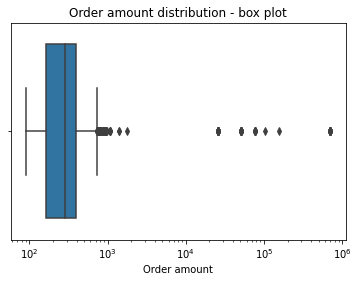

In [7]:
# create the boxplot
sns.boxplot(x = df['order_amount'])

# change the scale on the x axis to log
plt.xscale('log')

# set the x label and title
plt.xlabel('Order amount')
plt.title('Order amount distribution - box plot')

From plotting the data into a box plot, we can observe that there are indeed outliers with large values that are skewing the mean of the order amount. Moreover, when we sort the order amounts by the highest value, we can see that user 607 spent $704,000 repeatedly in separate transactions.

In [8]:
highest_orders = df.sort_values(by = 'order_amount', ascending = False)
highest_orders.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


This is a suspicious behavior, since the same user_id has made the same purchase of $704,000 every day for 17 days at the exact same time using a credit card. I would flag this transaction as a possible credit card fraud, and I'm interested to see if other outliers have similar transactions. To do so, we'll check the average order amount for each user and sort them by the highest average order amount.

In [9]:
# group by user id and describe - get the average for each one
order_amount_counts = df.groupby(['user_id'])['order_amount'].mean().sort_values(ascending = False).reset_index()
highest_orders = order_amount_counts.head(10)
highest_orders

,user_id,order_amount
0,607,704000.000000
1,878,14266.909091
2,766,8007.600000
3,834,6019.000000
4,915,5785.142857
5,962,5743.428571
6,775,5069.625000
7,817,5061.750000
8,928,5041.750000
9,855,4759.705882


We can also create a bar plot with the average order amount for those users.

Text(0.5, 1.0, 'Average order amount per User ID')

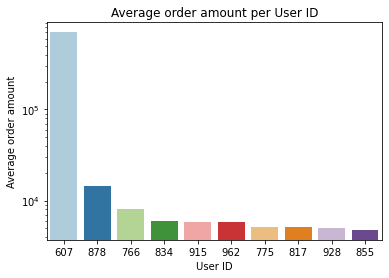

In [10]:
# create bar plot
sns.barplot(data = highest_orders, x = 'user_id', 
            y = 'order_amount', 
            order = highest_orders.sort_values('order_amount', ascending = False).user_id,
           palette = 'Paired')

# set the scale to log
plt.yscale('log')

# set the x and y labels, and the title
plt.xlabel('User ID')
plt.ylabel('Average order amount')
plt.title('Average order amount per User ID')

With this we can observe that user 607 has a suspiciously high average order amount. I would send this data to the team working on credit card fraud detection for further analysis.

<b>SUMMARY FOR QUESTION A)</b> the high AOV is a result of having outliers, such as the purchases made by user 607, that are skewing the average towards a larger value. I would recommend to remove the outliers before calculating the AOV.

To remove the outliers, we will use the interquartile (IQR) method, which first depends on finding the difference between the 75th and 25th percentiles.

In [11]:
# find the first quartile, represents 25% of our data
Q1 = df['order_amount'].quantile(0.25)

# find the third quartile, represents 75% of our data
Q3 = df['order_amount'].quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

After that, we will use the IQR to delimit the data we want to keep. The lower limit is defined as Q1 – 1.5 * IQR, while the upper limit is Q3 + 1.5 * IQR. As any data point outside of this range is considered an outlier, we will remove them from the analysis.

In [12]:
# create a dataframe for the data without outliers
df_cleaned = df[~((df['order_amount'] < (Q1 - 1.5 * IQR)) |
                  (df['order_amount'] > (Q3 + 1.5 * IQR)))]

Now we can see that the AOV for the data without the outliers is $293.71, which makes more sense when talking about a purchase of sneakers.

In [13]:
# check AOV for the cleaned dataframe
df_cleaned['order_amount'].describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

We can also plot the AOV on a histogram, and observe that the outliers have been indeed removed.

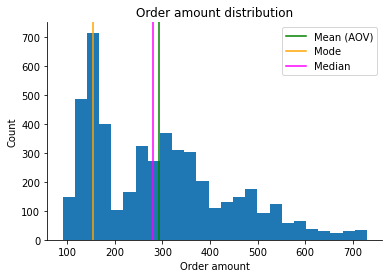

In [14]:
# create histogram
plt.figure()
plt.hist(df_cleaned['order_amount'], bins = 25)

# set lines for mean, mode and median
plt.axvline(df_cleaned['order_amount'].mean(), label = "Mean (AOV)", c = 'green')
plt.axvline(df_cleaned['order_amount'].mode()[0], label = "Mode", c = 'orange')
plt.axvline(df_cleaned['order_amount'].median(), label = "Median", c = 'magenta')

# set the labels and title
plt.xlabel('Order amount')
plt.ylabel('Count')
plt.title('Order amount distribution')

# to show the legend with mean, mode and median
plt.legend() 
# to remove the frame line around the plot
sns.despine()
# show the graph
plt.show()

<b>b) What metric would you report for this dataset?</b>

I would still report the AOV for this dataset, but without the presence of outliers.

<b>c) What is its value?</b>

The AOV for the data without outliers is $293.71.

<b>Question 2:</b> Using the given dataset, use SQL queries to answer the following questions.

<b>a) How many orders were shipped by Speedy Express in total?</b>

Since we only have 3 shippers, we know that Speedy Express' ID is 1. So we can count the number of orders from that shipper directly on the 'Orders' table without joining the tables.

SELECT COUNT(*) AS 'Total_orders_SpeedyExpress'
<br>
FROM Orders
<br>
WHERE ShipperID == 1;

The query above returns <b>54 orders</b> in total shipped by Speedy Express.

<b>b) What is the last name of the employee with the most orders?</b>

To select the employee that had the most orders, we first have to join the tables "Employees" and "Orders" using the employee ID - which is the same in both tables. Then we proceed to count the number of times each employee's last name appeared and order that list from the highest number of orders to the lowest.

SELECT Employees.LastName, COUNT(Employees.LastName) AS 'Total_orders'
<br>
FROM Orders
<br>
JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
<br>
GROUP BY Employees.LastName
<br>
ORDER BY COUNT(Employees.LastName) DESC;

With this query, we can observe that <b>Peacock</b> is the last name of the employee with the most orders.

<b>c) What product was ordered the most by customers in Germany?</b>

To answer this question, we will need data from the 'Orders', 'Customers', 'Order Details' and 'Products' tables. We'll then need to add the quantities for each product ordered by customers specifically in Germany. We'll also get the values for the 10 most ordered items in that country in a descending order so we can check if our calculation was done correctly.

SELECT Products.ProductName, SUM(OrderDetails.Quantity) 
<br>
FROM Orders JOIN Customers ON Orders.CustomerID = Customers.CustomerID
<br>
JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
<br>
JOIN Products ON Products.ProductID = OrderDetails.ProductID
<br>
WHERE Country = 'Germany'
<br>
GROUP BY Products.ProductName
<br>
ORDER BY SUM(OrderDetails.Quantity) DESC
<br>
LIMIT 10;

This query returns the <b>Boston Crab Meat</b> as the product that has been ordered the most by customers in Germany.